# Import Data and Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('data/top_agencies_clean.csv')

display(df.head())
df.shape

Unnamed: 0         created_date          closed_date agency  \
0           0  2017-07-09 23:26:34  2017-07-10 01:55:52   NYPD   
1           1  2017-07-09 23:11:08  2017-07-10 07:36:59   NYPD   
2           2  2017-07-09 23:15:39  2017-07-10 03:14:15   NYPD   
3           3  2017-07-09 20:12:26  2017-07-09 20:33:15   NYPD   
4           4  2017-07-09 13:31:16  2017-07-09 17:44:29   NYPD   

                       agency_name       complaint_type        descriptor  \
0  New York City Police Department  Noise - Residential  Loud Music/Party   
1  New York City Police Department  Noise - Residential  Loud Music/Party   
2  New York City Police Department  Noise - Residential  Loud Music/Party   
3  New York City Police Department  Noise - Residential      Loud Talking   
4  New York City Police Department  Noise - Residential      Loud Talking   

                location_type address_type  status  \
0  Residential Building/House      ADDRESS  Closed   
1  Residential Building/House      ADDRESS  Closed   
2  Residential Building/House      ADDRESS  Closed   
3  Residential Building/House      ADDRESS  Closed   
4  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

   new_zip                                       Unnamed: 0.1  \
0    11203  ZCTA5 11203: Summary level: 860, zip code tabu...   
1    10469  ZCTA5 10469: Summary level: 860, zip code tabu...   
2    10458  ZCTA5 10458: Summary level: 860, zip code tabu...   
3    10031  ZCTA5 10031: Summary level: 860, zip code tabu...   
4    11377  ZCTA5 11377: Summary level: 860, zip code tabu...   

   total_population  median_income  median_age  minority_rep  hs_or_above  \
0             75451          30301        39.8      0.961816     0.786099   
1             73870          29338        40.2      0.892961     0.705336   
2             83960          17907        29.0      0.916687     0.614682   
3             60254          25155        34.2      0.825987     0.699188   
4             86421          30227        40.0      0.790479     0.703111   

   bach_or_above  poverty_rate  unemployment_rate  
0       0.234683      0.147213           0.064832  
1       0.249883      0.134557           0.087722  
2       0.143008      0.313134           0.132113  
3       0.359176      0.210074           0.068703  
4       0.286637      0.107048           0.040060

(15492091, 25)

In [5]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'agency_name'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15492091 entries, 0 to 15492090
Data columns (total 22 columns):
created_date              object
closed_date               object
agency                    object
complaint_type            object
descriptor                object
location_type             object
address_type              object
status                    object
resolution_description    object
community_board           object
borough                   object
open_data_channel_type    object
location                  object
new_zip                   int64
total_population          int64
median_income             int64
median_age                float64
minority_rep              float64
hs_or_above               float64
bach_or_above             float64
poverty_rate              float64
unemployment_rate         float64
dtypes: float64(6), int64(3), object(13)
memory usage: 2.5+ GB


## Convert data types

In [7]:
df.created_date = pd.to_datetime(df.created_date)
df.closed_date = pd.to_datetime(df.closed_date)
df.new_zip = df.new_zip.astype('str')

# New Variables

## Additional Date Variables

In [8]:
df['created_day_o_wk'] = df.created_date.dt.dayofweek
df['created_month'] = df.created_date.dt.month
df['created_day_o_yr'] = df.created_date.dt.dayofyear
df['created_yr'] = df.created_date.dt.year
df['created_time'] = df.created_date.dt.time
df['created_hr'] = df.created_date.dt.hour
df['created_date_only'] = df.created_date.dt.date

df.head()

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD  Noise - Residential   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD  Noise - Residential   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
2  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
3      Loud Talking  Residential Building/House      ADDRESS  Closed   
4      Loud Talking  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr created_date_only  
0          23        2017-07-09  
1          23        2017-07-09  
2          23        2017-07-09  
3          20        2017-07-09  
4          13        2017-07-09

## Adding Response Time

In [9]:
df['response_time'] = df.closed_date - df.created_date
df['response_time'] = df['response_time'] / np.timedelta64(1,'D')
df = df[df['response_time'] > 0]

df.head()

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD  Noise - Residential   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD  Noise - Residential   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
2  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
3      Loud Talking  Residential Building/House      ADDRESS  Closed   
4      Loud Talking  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr created_date_only  response_time  
0          23        2017-07-09       0.103681  
1          23        2017-07-09       0.351285  
2          23        2017-07-09       0.165694  
3          20        2017-07-09       0.014456  
4          13        2017-07-09       0.175845

# Inspecting Variables

## Number of Unique Values

In [10]:
counts = []
for col in df.columns:
    c = df[col].nunique()
    counts.append(c)

variable_counts = pd.DataFrame({'variable': df.columns.values, 
                                'unique values': counts})

variable_counts

variable  unique values
0             created_date        9891695
1              closed_date        6230412
2                   agency              8
3           complaint_type             30
4               descriptor            420
5            location_type             75
6             address_type              5
7                   status              7
8   resolution_description            819
9          community_board             77
10                 borough              6
11  open_data_channel_type              5
12                location        1209135
13                 new_zip            184
14        total_population            184
15           median_income            183
16              median_age            116
17            minority_rep            184
18             hs_or_above            184
19           bach_or_above            184
20            poverty_rate            183
21       unemployment_rate            182
22        created_day_o_wk              7
23           created_month             12
24        created_day_o_yr            366
25              created_yr             11
26            created_time          86400
27              created_hr             24
28       created_date_only           3744
29           response_time        1774179

## Variable Counts

In [147]:
def count_plots(df, n=30):
    for col in df.columns:
        if df[col].nunique() <= n:
            ax = plt.figure(figsize=(10,10)) 
            ax = df[col].value_counts().sort_values().plot(kind = 'barh',
                                                           color='#5a7d9a')           
            plt.title(f'Count of {col}', fontsize=16)
            plt.show()

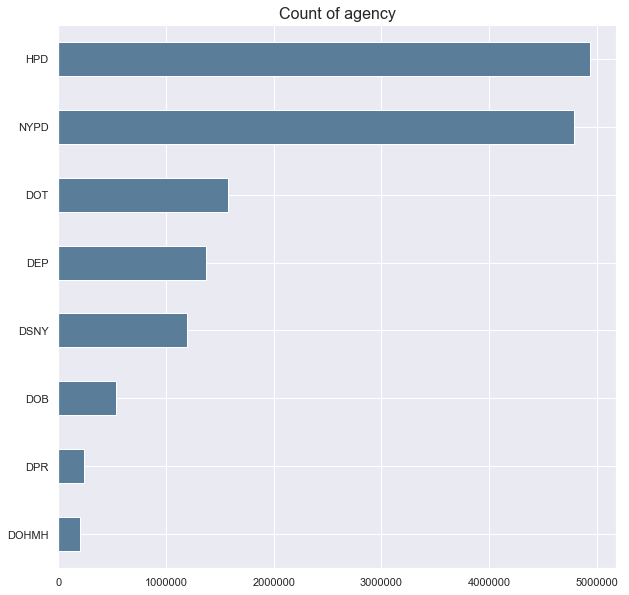

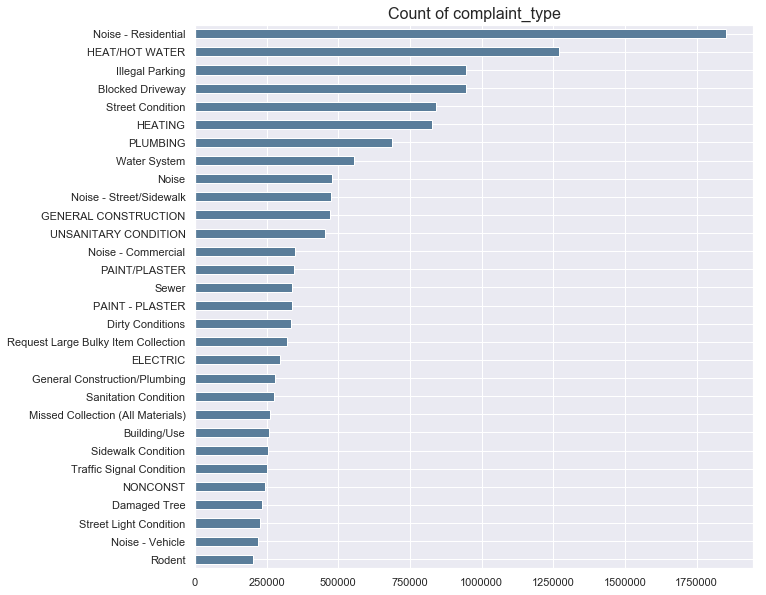

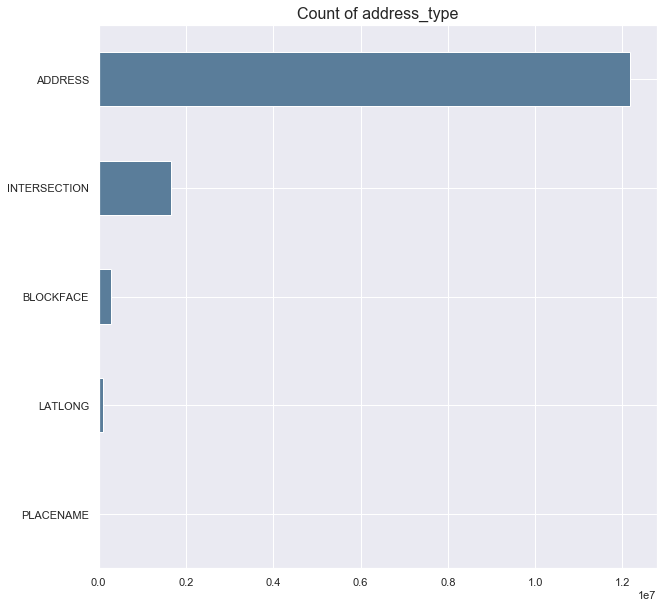

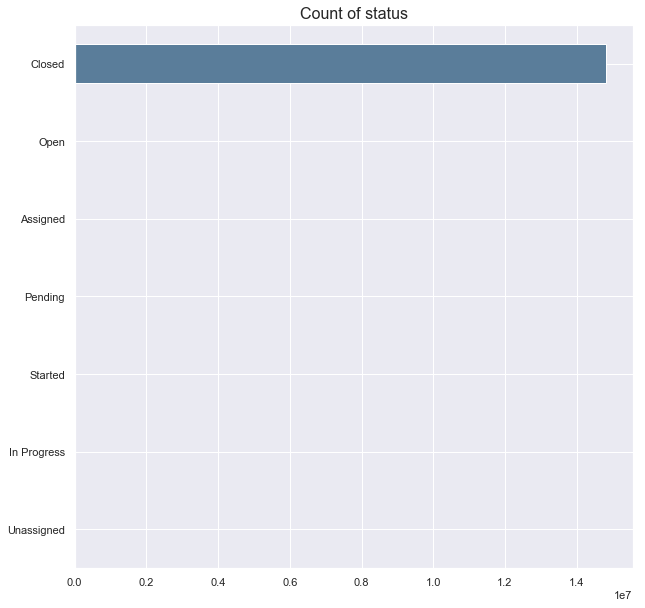

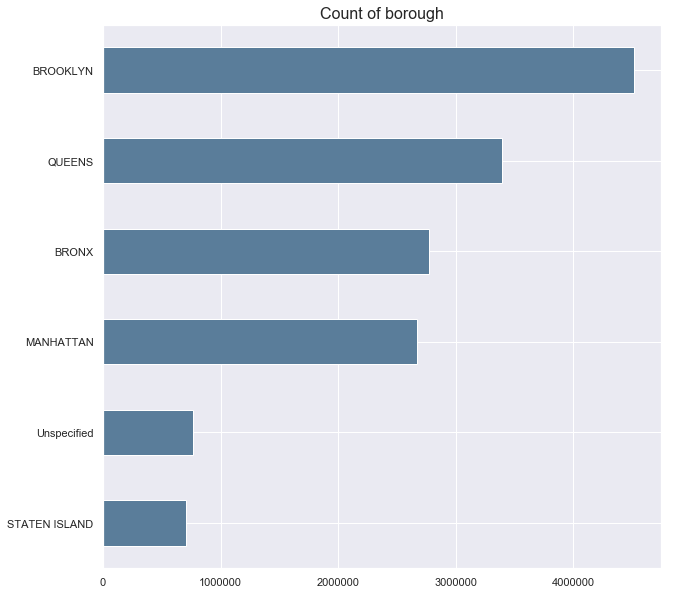

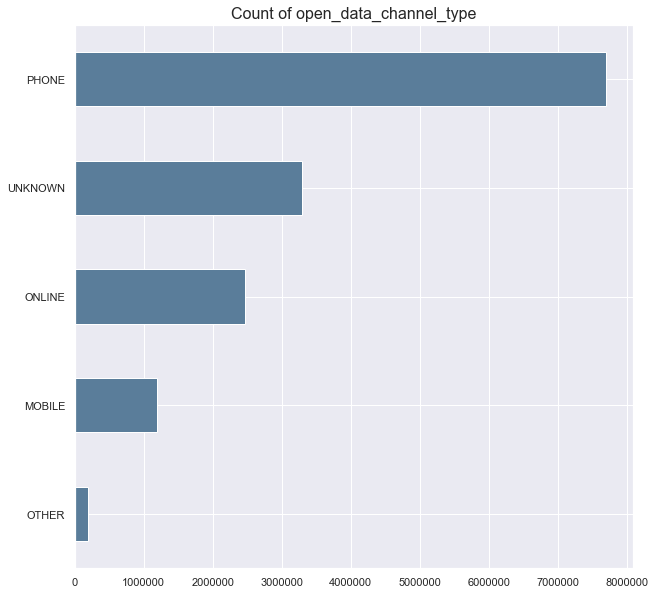

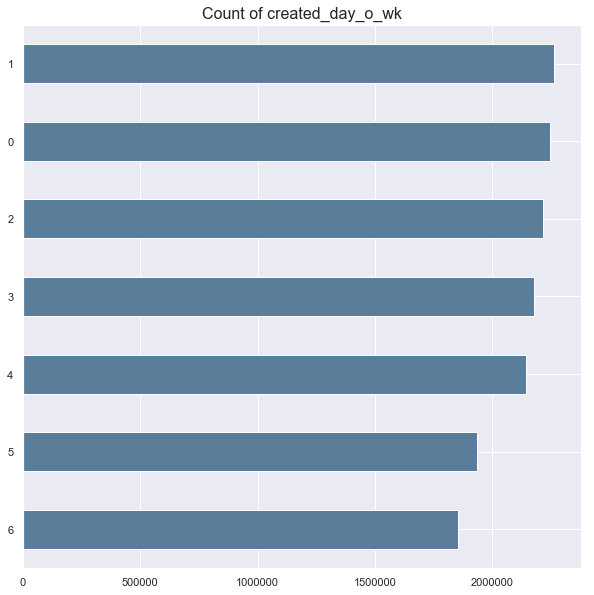

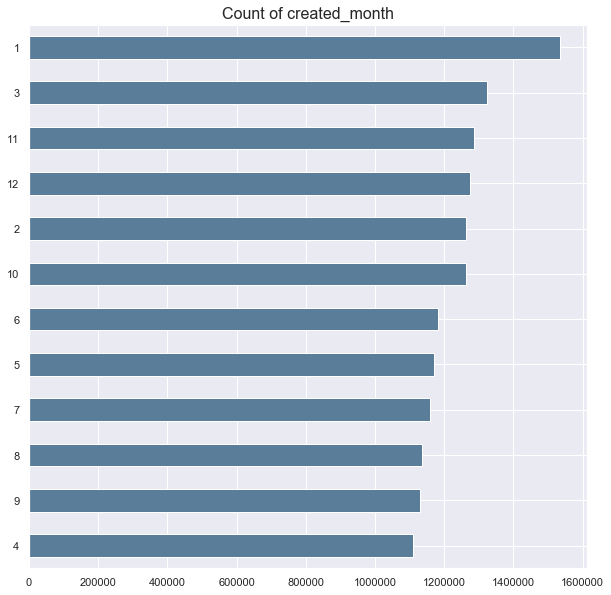

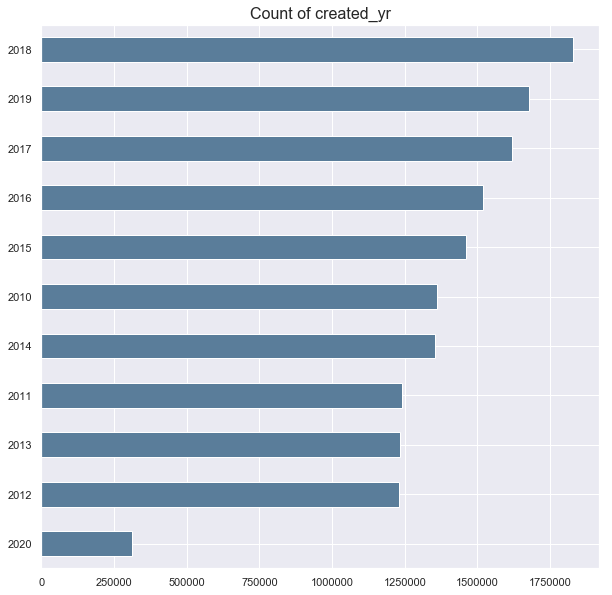

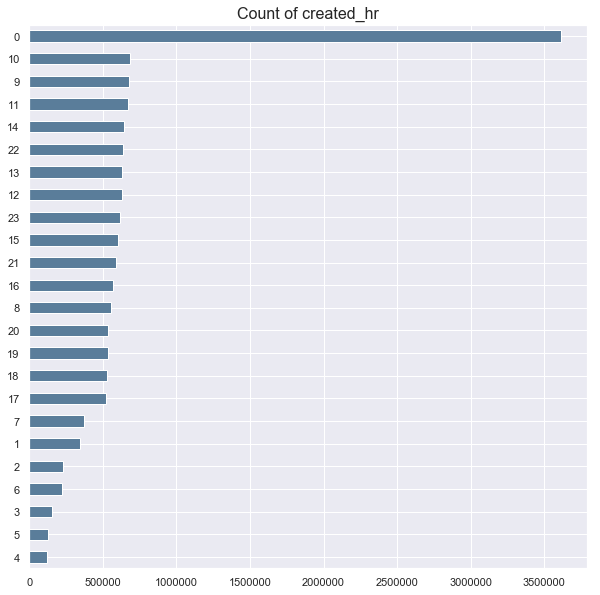

In [148]:
count_plots(df)

### Additional Drops (start df2)

In [32]:
df2 = df[df['status'] == 'Closed']
df2 = df2[df2['borough'] != 'Unspecified']
df2 = df2[df2['created_yr'] < 2020]
df2 = df2[df2['complaint_type'] != 'Request Large Bulky Item Collection']

df2.drop(columns=['status'])

display(df2.shape)
df2.head()

(13421538, 30)

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD  Noise - Residential   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD  Noise - Residential   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
2  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
3      Loud Talking  Residential Building/House      ADDRESS  Closed   
4      Loud Talking  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr created_date_only  response_time  
0          23        2017-07-09       0.103681  
1          23        2017-07-09       0.351285  
2          23        2017-07-09       0.165694  
3          20        2017-07-09       0.014456  
4          13        2017-07-09       0.175845

# Request Volumes

## Total Weekly Requests

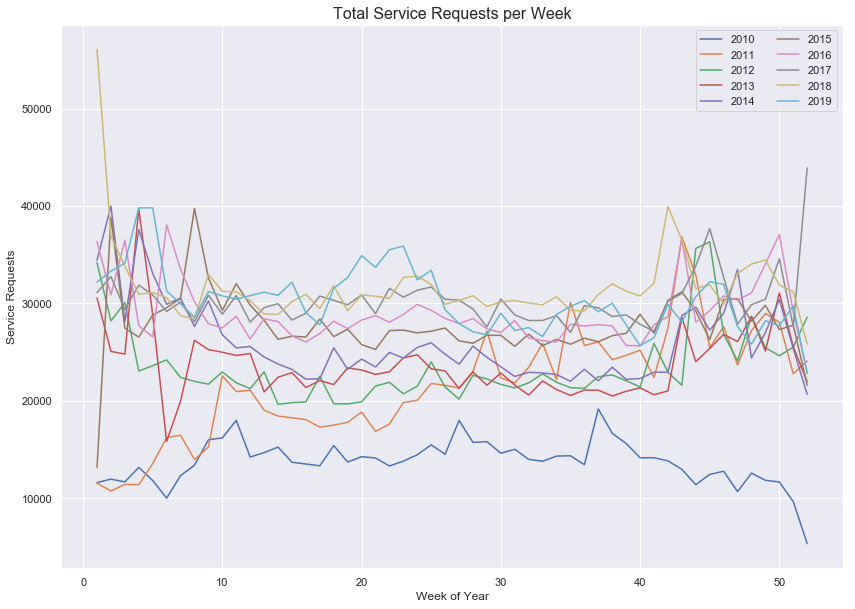

In [180]:
weekly_sr_by_yr = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.created_yr, 
                    values='created_date', aggfunc=len)

fig, ax = plt.subplots(figsize=(14,10))
# plot values in a line graph
# drop the 53rd week (leap year) which has Nans for most years
weekly_sr_by_yr.dropna().plot(ax=ax)
plt.title('Total Service Requests per Week 2010-2019', fontsize=16)
plt.ylabel('Service Requests')
plt.xlabel('Week of Year')
plt.legend(ncol=2)
plt.show()

## Mean & Median Total Weekly Requests

In [48]:
weekly_sr_by_yr

created_yr       2010     2011     2012     2013     2014     2015     2016  \
created_date                                                                  
1             11584.0  11520.0  34174.0  30537.0  34423.0  13118.0  36335.0   
2             11934.0  10718.0  28186.0  25059.0  39980.0  38814.0  30863.0   
3             11660.0  11392.0  30058.0  24784.0  28111.0  27440.0  36469.0   
4             13143.0  11367.0  23038.0  39685.0  37564.0  26528.0  27711.0   
5             11797.0  13541.0  23592.0  28829.0  33076.0  28788.0  26532.0   
6              9986.0  16213.0  24186.0  15808.0  29896.0  29539.0  38050.0   
7             12295.0  16447.0  22386.0  19943.0  30522.0  30528.0  33494.0   
8             13370.0  13948.0  21979.0  26205.0  27615.0  39733.0  30156.0   
9             15981.0  15243.0  21693.0  25241.0  30236.0  32609.0  27890.0   
10            16176.0  22542.0  22947.0  24971.0  26759.0  29282.0  27469.0   
11            17976.0  20933.0  21838.0  24640.0  25424.0  32010.0  28658.0   
12            14207.0  21066.0  21237.0  24839.0  25558.0  29826.0  26336.0   
13            14663.0  19016.0  22960.0  20897.0  24490.0  28252.0  28395.0   
14            15229.0  18416.0  19616.0  22399.0  23763.0  26296.0  28122.0   
15            13675.0  18231.0  19800.0  22879.0  23206.0  26617.0  26658.0   
16            13490.0  18050.0  19877.0  21346.0  22193.0  26535.0  26023.0   
17            13308.0  17277.0  22492.0  22059.0  22249.0  28379.0  26890.0   
18            15390.0  17485.0  19685.0  21653.0  25427.0  26570.0  28165.0   
19            13691.0  17770.0  19662.0  23363.0  23223.0  27339.0  27389.0   
20            14243.0  18835.0  19878.0  23146.0  24272.0  25760.0  28267.0   
21            14109.0  16835.0  21501.0  22695.0  23459.0  25255.0  28739.0   
22            13290.0  17594.0  21880.0  22959.0  24950.0  27193.0  28043.0   
23            13790.0  19795.0  20702.0  24380.0  24374.0  27248.0  28851.0   
24            14438.0  20034.0  21483.0  24713.0  25463.0  26959.0  29887.0   
25            15456.0  21757.0  23976.0  23264.0  25941.0  27128.0  29273.0   
26            14499.0  21573.0  21385.0  23055.0  24767.0  27461.0  28440.0   
27            17964.0  21297.0  20154.0  21252.0  23743.0  26142.0  27915.0   
28            15710.0  23012.0  22597.0  22935.0  25605.0  25895.0  28429.0   
29            15789.0  27140.0  22220.0  21579.0  24444.0  26715.0  27366.0   
30            14598.0  22330.0  21673.0  22844.0  23475.0  26704.0  27006.0   
31            15005.0  21821.0  21304.0  21603.0  22484.0  25577.0  28225.0   
32            13966.0  23415.0  21825.0  20572.0  22907.0  26827.0  26448.0   
33            13778.0  25873.0  22757.0  22018.0  22842.0  25647.0  26160.0   
34            14306.0  22147.0  21885.0  21141.0  22685.0  26294.0  26006.0   
35            14338.0  30097.0  21337.0  20536.0  21988.0  25795.0  27838.0   
36            13419.0  25661.0  21260.0  21087.0  23217.0  26418.0  27664.0   
37            19147.0  26034.0  22457.0  21077.0  22039.0  26050.0  27801.0   
38            16644.0  24208.0  22635.0  20475.0  23435.0  26673.0  27678.0   
39            15604.0  24647.0  22042.0  20961.0  22185.0  26919.0  25664.0   
40            14134.0  25174.0  21404.0  21321.0  22272.0  28870.0  25624.0   
41            14138.0  22387.0  25889.0  20600.0  22926.0  26935.0  27792.0   
42            13819.0  27447.0  22905.0  21000.0  22913.0  30292.0  28627.0   
43            12944.0  36816.0  21581.0  28541.0  28749.0  31178.0  36619.0   
44            11366.0  32907.0  35633.0  23998.0  29599.0  29205.0  28062.0   
45            12423.0  25423.0  36306.0  25354.0  27253.0  26269.0  29238.0   
46            12750.0  27611.0  26814.0  26808.0  28967.0  30395.0  30741.0   
47            10653.0  23655.0  24082.0  26070.0  33450.0  30455.0  30319.0   
48            12554.0  27197.0  28665.0  28629.0  24379.0  28158.0  31067.0   
49            11815.0  28950.0  25434.0  25096.0  

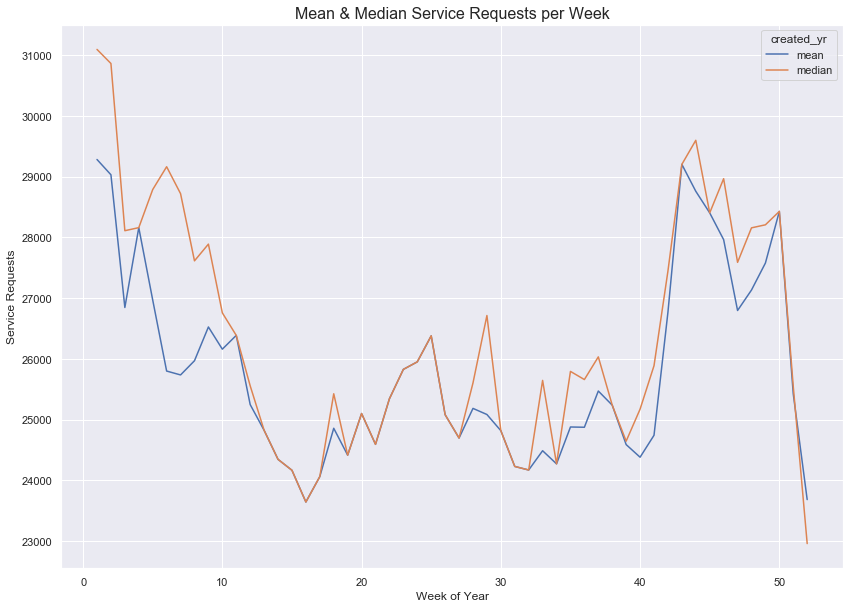

In [50]:
weekly_sr_by_yr.dropna(inplace=True)
weekly_sr_by_yr['mean'] = weekly_sr_by_yr.mean(axis=1)
weekly_sr_by_yr['median'] = weekly_sr_by_yr.median(axis=1)

fig, ax = plt.subplots(figsize=(14,10))
weekly_sr_by_yr[['mean', 'median']].plot(ax=ax)
plt.title('Mean & Median Service Requests per Week 2010-2019', fontsize=16)
plt.ylabel('Service Requests')
plt.xlabel('Week of Year')
plt.show()

## Request Volume by Complaint Type

### Total Weekly Requests by Complaint Type

In [92]:
weekly_sr_by_ctype = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.complaint_type, 
                    values='created_date', aggfunc=len).dropna()

In [68]:
weekly_sr_by_ctype

complaint_type  Blocked Driveway  Building/Use  Damaged Tree  \
created_date                                                   
1                        18230.0        4031.0        1248.0   
2                        17376.0        4517.0        1542.0   
3                        15865.0        4167.0        1195.0   
4                        17776.0        4410.0        2015.0   
5                        17963.0        4596.0        1626.0   
6                        18401.0        4437.0        2022.0   
7                        17420.0        4335.0        2177.0   
8                        16552.0        4335.0        2192.0   
9                        16904.0        4548.0        4059.0   
10                       17514.0        4748.0        5244.0   
11                       18166.0        4634.0        3381.0   
12                       16841.0        4936.0        2514.0   
13                       16243.0        4672.0        2856.0   
14                       15977.0        4912.0        2406.0   
15                       15680.0        5140.0        2081.0   
16                       15906.0        4915.0        2492.0   
17                       15476.0        5220.0        2731.0   
18                       16484.0        5008.0        3869.0   
19                       17031.0        5932.0        3495.0   
20                       17241.0        5366.0        4865.0   
21                       16428.0        5362.0        4003.0   
22                       17213.0        5041.0        4016.0   
23                       17901.0        5493.0        4601.0   
24                       18274.0        5522.0        4667.0   
25                       18704.0        5554.0        5142.0   
26                       17072.0        5556.0        4811.0   
27                       15689.0        4802.0        4570.0   
28                       16571.0        5317.0        5952.0   
29                       16383.0        5402.0        7267.0   
30                       16387.0        5458.0        6824.0   
31                       16160.0        5352.0        5279.0   
32                       15996.0        5628.0        5143.0   
33                       15835.0        5412.0        5284.0   
34                       15275.0        5012.0        6881.0   
35                       16187.0        5187.0        8721.0   
36                       18723.0        4837.0        4911.0   
37                       19284.0        5264.0        8854.0   
38                       18719.0        5215.0        6698.0   
39                       18698.0        5298.0        4460.0   
40                       18273.0        5050.0        3662.0   
41                       17808.0        4698.0        3983.0   
42                       18305.0        4917.0        4102.0   
43                       19165.0        4769.0        5022.0   
44                       18726.0        4670.0       22060.0   
45                       19460.0        4382.0       10991.0   
46                       19968.0        4316.0        7421.0   
47                       19525.0        3886.0        3470.0   
48                       19400.0        4211.0        3233.0   
49                       19766.0        4463.0        2386.0   
50                       19679.0        3962.0        1735.0   
51                       19833.0        3521.0        1769.0   
52                       19096.0        3193.0        1322.0   

complaint_type  Dirty Conditions  ELECTRIC  GENERAL CONSTRUCTION  \
created_date                                                       
1                         4989.0    4942.0                6636.0   
2                         5467.0    5432.0                7942.0   
3                         5572.0    4934.0                7413.0   
4                         4525.0    4851.0                7443.0   
5                         4971.0    5023.0                7292.0   
6                         4460.0    4810.0                5827.0   

In [151]:
# iterate through the pivot table and plot a line graph for weach complaint type
def plot_sr(pivot_table, figsize=(15,40), hspace=.9):
    
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=hspace)

    nrows = len(pivot_table.columns) //2 +1 
    ncols = 2
    
    for i,t in enumerate(list(pivot_table.columns)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        pivot_table[t].plot(ax=ax)
        plt.title(t + '_Total Weekly Requests')

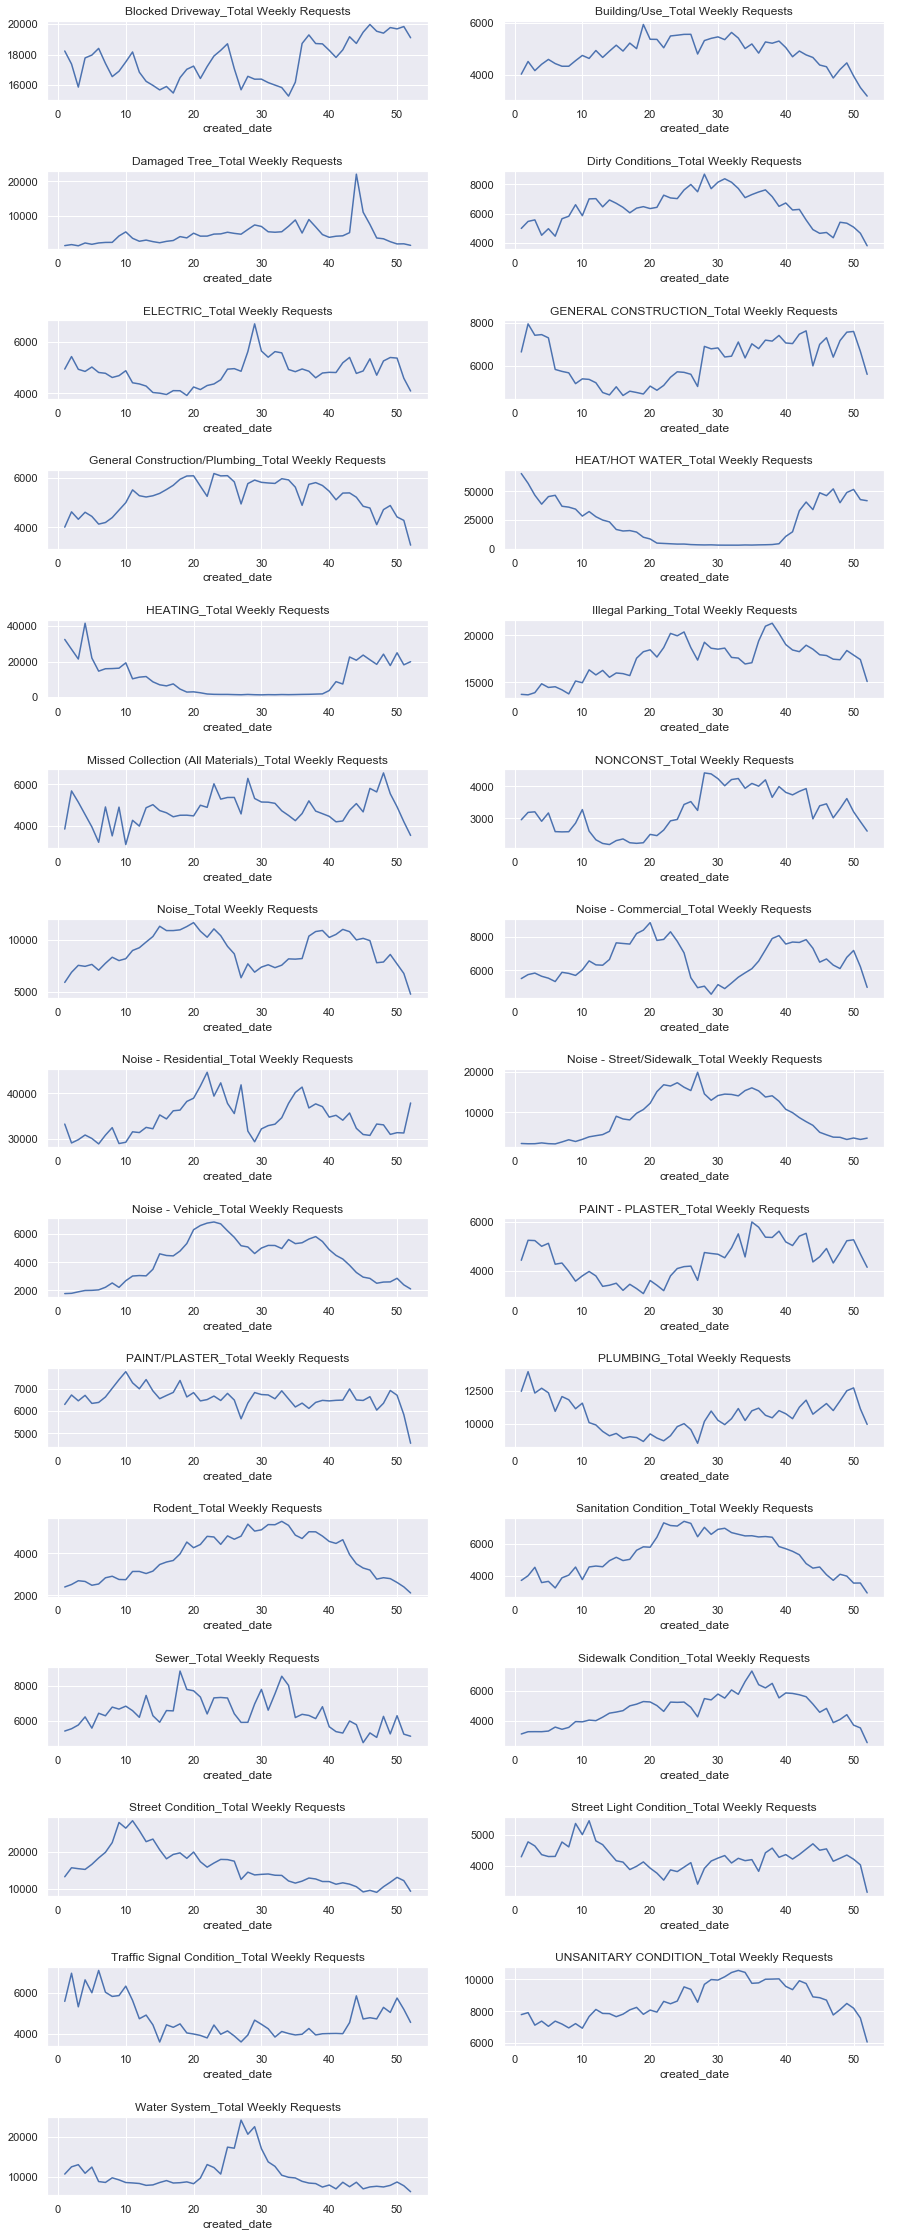

In [70]:
plot_sr(weekly_sr_by_ctype)

### Mean & Median Weekly Requests by Complaint Type

In [138]:
weekly_sr_by_ctype_yr = pd.pivot_table(df2, 
                                    index=[df2.complaint_type, 
                                           df2.created_date.dt.weekofyear], 
                                    columns=df2.created_yr, 
                                    values='created_date', 
                                    aggfunc=len).drop(index=53, level=1)

In [140]:
weekly_sr_by_ctype_yr['mean'] = weekly_sr_by_ctype_yr.mean(axis=1)
weekly_sr_by_ctype_yr['median'] = weekly_sr_by_ctype_yr.median(axis=1)

weekly_sr_by_ctype_yr.head()

created_yr                      2010    2011    2012    2013    2014    2015  \
complaint_type   created_date                                                  
Blocked Driveway 1             867.0  1376.0  1035.0  1244.0  1696.0   976.0   
                 2             892.0  1515.0   944.0   982.0  1147.0  1707.0   
                 3             882.0  1267.0   993.0  1020.0  1190.0  1392.0   
                 4             914.0  1708.0   912.0   967.0  1345.0  1607.0   
                 5             954.0  2068.0   908.0  1051.0  1444.0  1823.0   

created_yr                       2016    2017    2018    2019    mean  median  
complaint_type   created_date                                                  
Blocked Driveway 1             2074.0  2478.0  3323.0  3161.0  1823.0  1696.0  
                 2             2171.0  2449.0  2973.0  2596.0  1737.6  1707.0  
                 3             1787.0  2404.0  2443.0  2487.0  1586.5  1392.0  
                 4             3134.0  2348.0  2458.0  2383.0  1777.6  1708.0  
                 5             2222.0  2299.0  2497.0  2697.0  1796.3  1823.0

In [145]:
complaint_types = sorted(list(df2.complaint_type.unique()))

In [161]:
def plot_sr_by(pivot_table, variable_list, figsize=(15,60), hspace=.5):
    """docstring"""
    
    fig = plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=hspace)

    nrows = len(variable_list) //2 +1 
    ncols = 2

    for i,t in enumerate(list(variable_list)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        pivot_table.loc[t][['mean','median']].plot(ax=ax)
        plt.title(t + '_Mean & Median Weekly Requests 2010-2019')
        plt.legend(title='Weekly Requests')

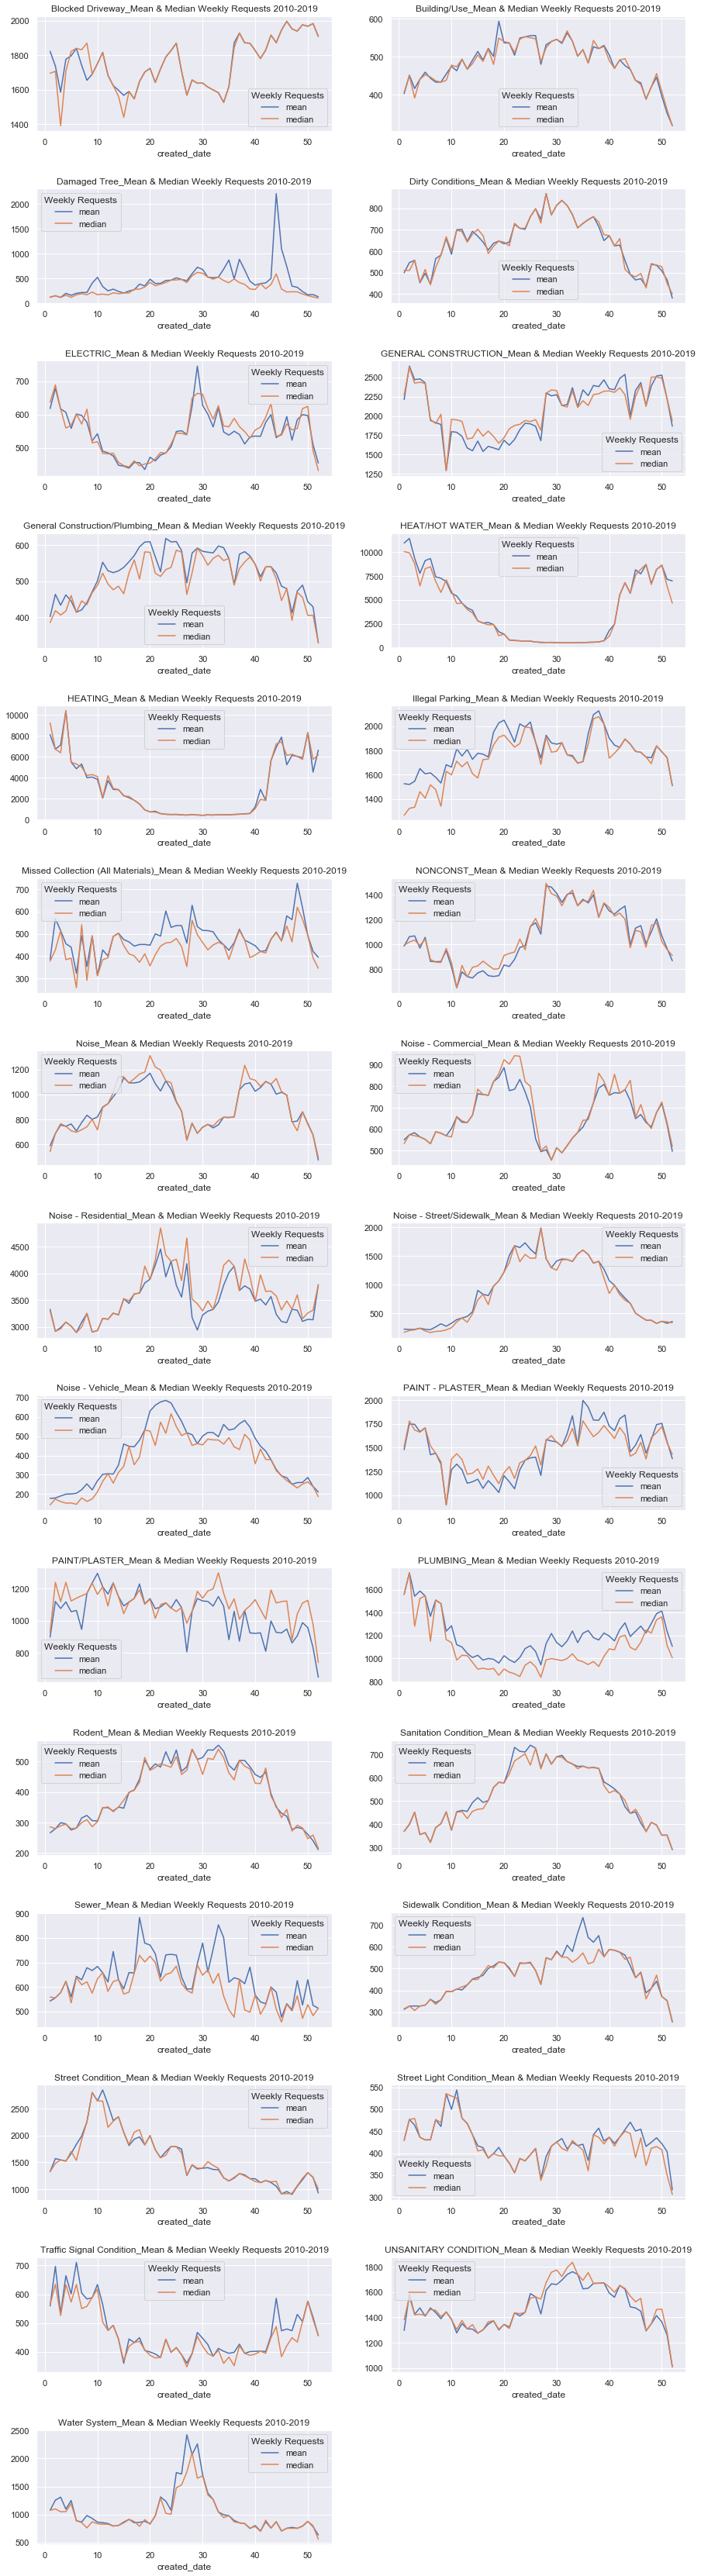

In [162]:
plot_sr_by(weekly_sr_by_ctype_yr, complaint_types)

## Request Volume by Agency

### Total Requests by Agency

In [149]:
weekly_sr_by_agy = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.agency, 
                    values='created_date', aggfunc=len).drop(index=53)

In [ ]:
weekly_sr_by_agy.plot(figsize=(16,8))

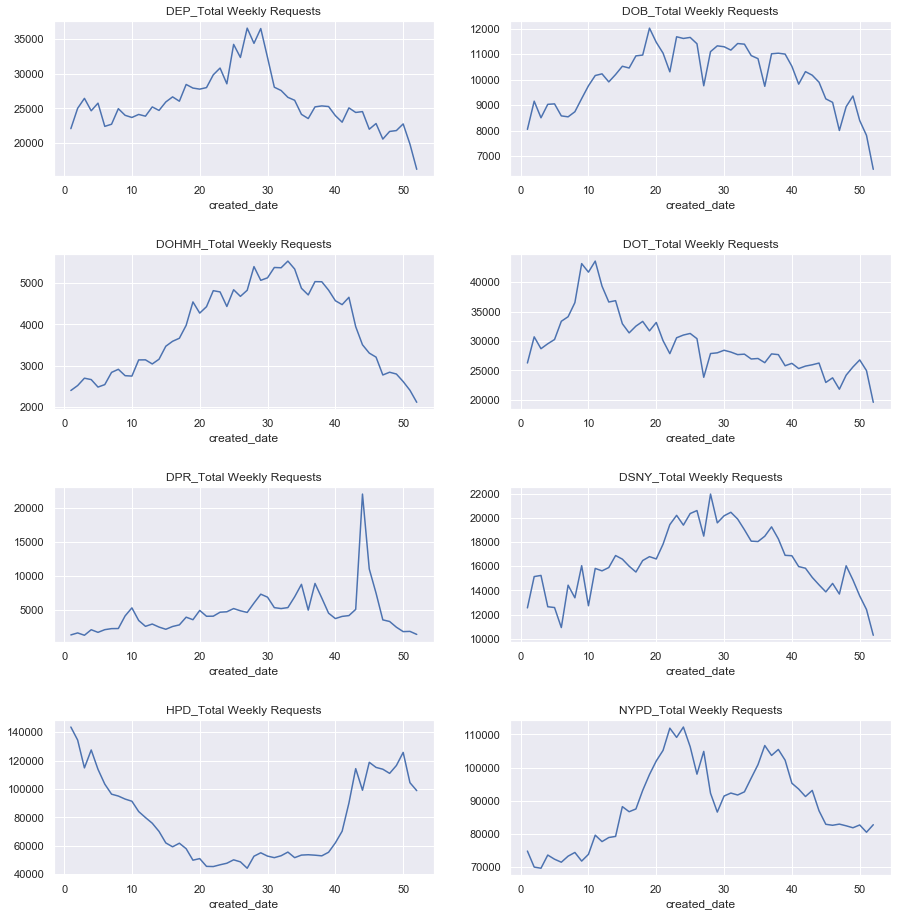

In [153]:
plot_sr(weekly_sr_by_agy, figsize=(15,20), hspace=.5)

### Mean & Median Weekly Requests by Agency

In [154]:
weekly_sr_by_agy_yr = pd.pivot_table(df2, 
                                     index=[df2.agency, 
                                            df2.created_date.dt.weekofyear], 
                                     columns=df2.created_yr, 
                                     values='created_date', 
                                     aggfunc=len).drop(index=53, level=1)

weekly_sr_by_agy_yr['mean'] = weekly_sr_by_agy_yr.mean(axis=1)
weekly_sr_by_agy_yr['median'] = weekly_sr_by_agy_yr.median(axis=1)

weekly_sr_by_agy_yr.head()

created_yr             2010    2011    2012    2013    2014    2015    2016  \
agency created_date                                                           
DEP    1             2200.0  1831.0  2026.0  2291.0  2026.0   814.0  2691.0   
       2             2158.0  1699.0  1621.0  2259.0  3098.0  2330.0  2253.0   
       3             1962.0  2071.0  1492.0  1834.0  2407.0  3122.0  4080.0   
       4             2194.0  1942.0  1847.0  2379.0  1944.0  2735.0  2349.0   
       5             2041.0  2035.0  1791.0  3368.0  2805.0  1793.0  2487.0   

created_yr             2017    2018    2019    mean  median  
agency created_date                                          
DEP    1             2025.0  3660.0  2526.0  2209.0  2200.0  
       2             2458.0  4586.0  2549.0  2501.1  2330.0  
       3             2919.0  3920.0  2630.0  2643.7  2630.0  
       4             2748.0  3065.0  3451.0  2465.4  2379.0  
       5             3636.0  2721.0  3074.0  2575.1  2575.1

In [156]:
agencies = sorted(list(df2.agency.unique()))
agencies

['DEP', 'DOB', 'DOHMH', 'DOT', 'DPR', 'DSNY', 'HPD', 'NYPD']

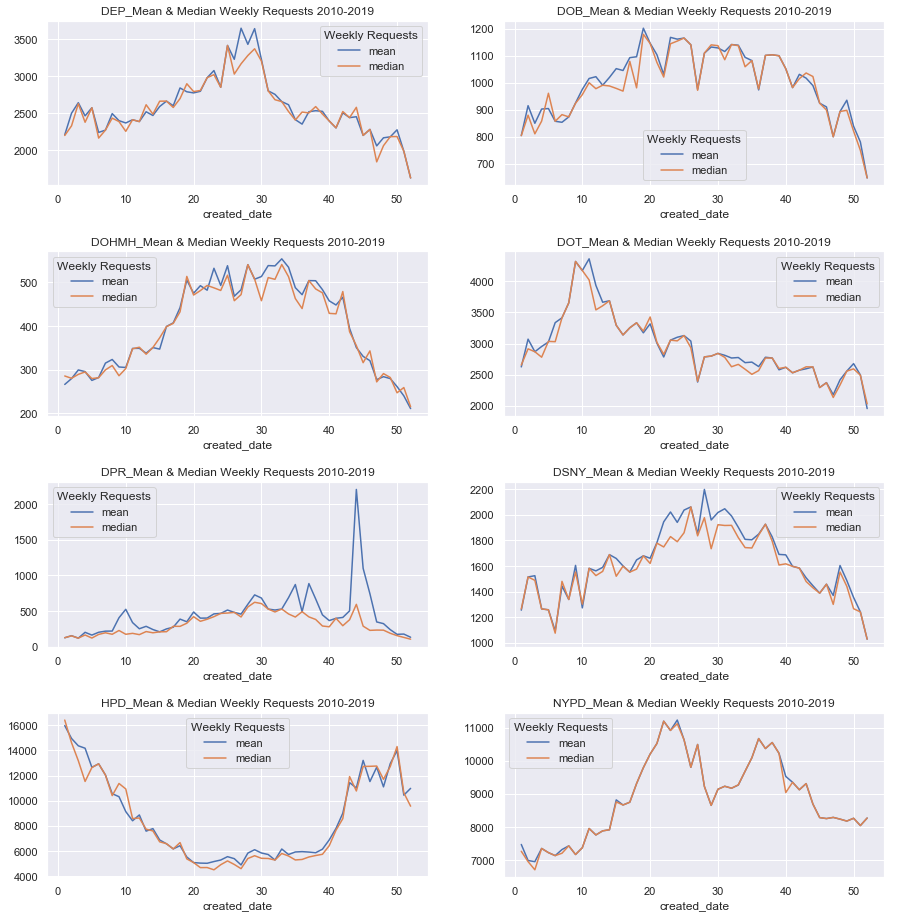

In [170]:
plot_sr_by(weekly_sr_by_agy_yr, agencies, figsize=(15,20), hspace=.4)

## Request Volume by Borough

### Total Weekly Requests by Borough

In [171]:
weekly_sr_by_boro = pd.pivot_table(df2, index=df2.created_date.dt.weekofyear, columns=df2.borough, 
                    values='created_date', aggfunc=len).drop(index=53)

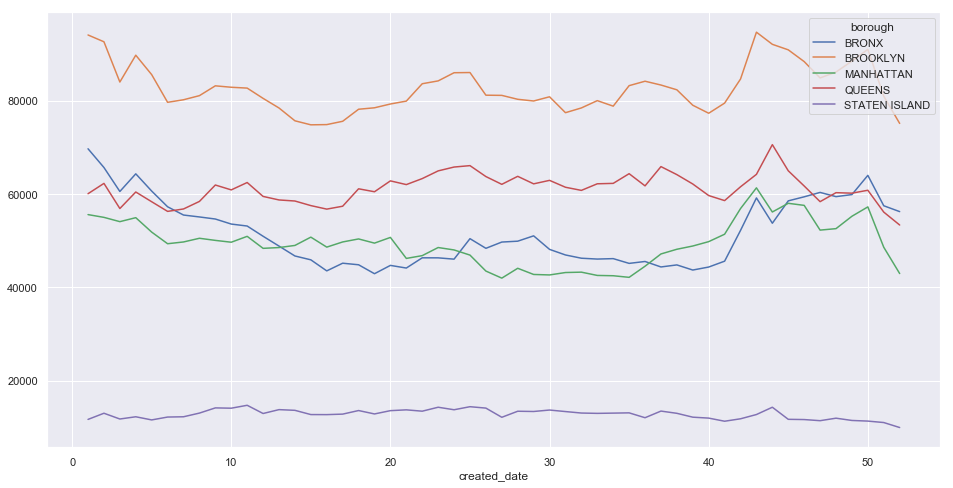

In [179]:
weekly_sr_by_boro.plot(figsize=(16,8))

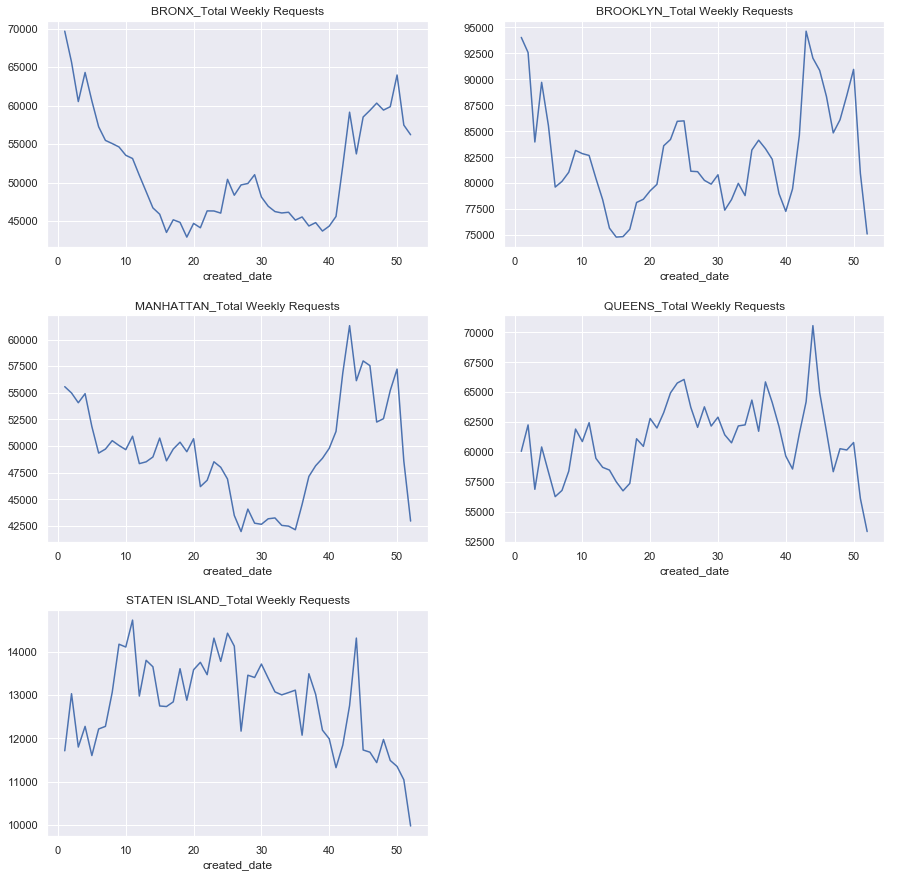

In [175]:
plot_sr(weekly_sr_by_boro, figsize=(15,15), hspace=.3)

### Mean & Median Requests by Borough

In [186]:
weekly_sr_by_boro_yr = pd.pivot_table(df2, 
                                     index=[df2.borough, 
                                            df2.created_date.dt.weekofyear], 
                                     columns=df2.created_yr, 
                                     values='created_date', 
                                     aggfunc=len).drop(index=53, level=1)

weekly_sr_by_boro_yr['mean'] = weekly_sr_by_boro_yr.mean(axis=1)
weekly_sr_by_boro_yr['median'] = weekly_sr_by_boro_yr.median(axis=1)

weekly_sr_by_boro_yr.head()

created_yr              2010    2011    2012     2013     2014    2015  \
borough created_date                                                     
BRONX   1             1615.0  1614.0  8558.0   7523.0   9142.0  3161.0   
        2             1750.0  1550.0  6869.0   5432.0   9553.0  9640.0   
        3             1653.0  1668.0  8009.0   5828.0   6555.0  6281.0   
        4             1775.0  1672.0  5577.0  10056.0  10415.0  5881.0   
        5             1809.0  1810.0  5708.0   6679.0   8236.0  6969.0   

created_yr              2016    2017     2018     2019    mean  median  
borough created_date                                                    
BRONX   1             8789.0  7988.0  14211.0   7067.0  6966.8  7523.0  
        2             7221.0  7747.0   8355.0   7537.0  6565.4  7221.0  
        3             8772.0  6374.0   7330.0   8054.0  6052.4  6374.0  
        4             6280.0  6859.0   6257.0   9532.0  6430.4  6280.0  
        5             5870.0  6725.0   6708.0  10097.0  6061.1  6679.0

In [182]:
boroughs = sorted(list(df2.borough.unique()))
boroughs

['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND']

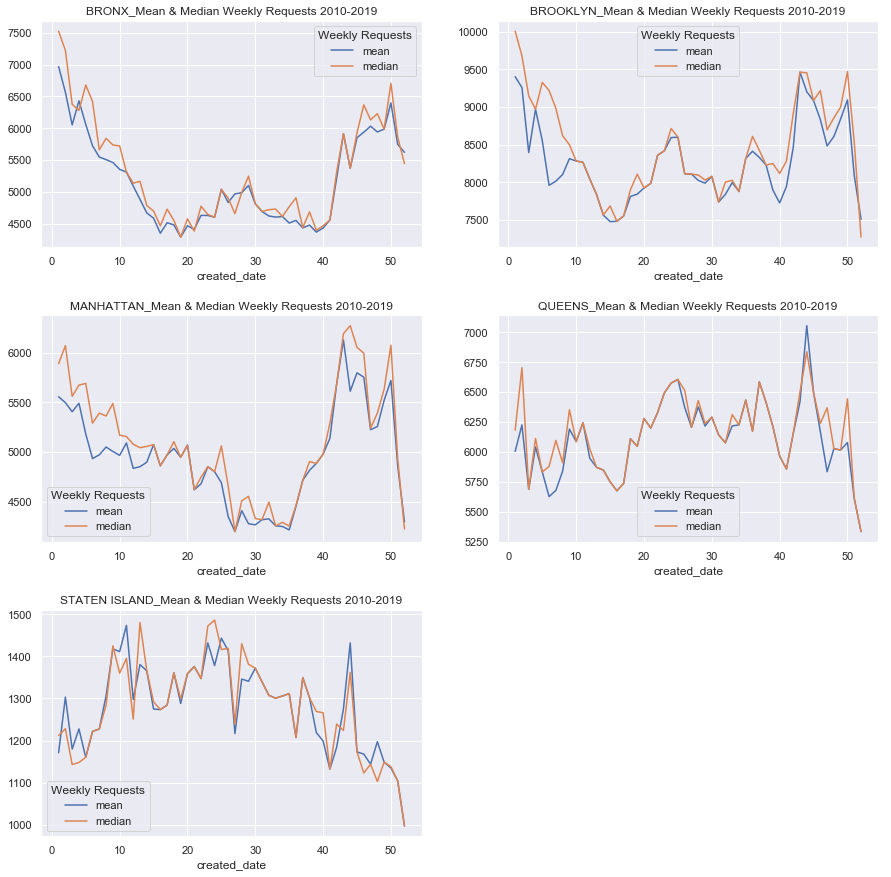

In [188]:
plot_sr_by(weekly_sr_by_boro_yr, boroughs, figsize=(15,15), hspace=.3)

# Storage

In [193]:
df2.head(2)

created_date         closed_date agency       complaint_type  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD  Noise - Residential   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD  Noise - Residential   

         descriptor               location_type address_type  status  \
0  Loud Music/Party  Residential Building/House      ADDRESS  Closed   
1  Loud Music/Party  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   

    borough open_data_channel_type                                 location  \
0  BROOKLYN                 MOBILE  (40.65087119116162, -73.93997156019773)   
1     BRONX                  PHONE  (40.85829772629949, -73.85445497857519)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   

   created_hr created_date_only  response_time  
0          23        2017-07-09       0.103681  
1          23        2017-07-09       0.351285

In [195]:
len(df2[df2['borough'] == 'BRONX'].total_population.unique()) == len(df2[df2['borough'] == 'BRONX'].new_zip.unique())

True

In [197]:
bronx_pop = df2[df2['borough'] == 'BRONX'].total_population.unique().sum()

In [200]:
weekly_sr_by_boro_yr.loc['BRONX'] / (bronx_pop/1000)

created_yr        2010      2011      2012      2013      2014      2015  \
created_date                                                               
1             1.064154  1.063495  5.639026  4.957045  6.023834  2.082842   
2             1.153108  1.021324  4.526112  3.579246  6.294650  6.351976   
3             1.089193  1.099076  5.277280  3.840178  4.319212  4.138668   
4             1.169581  1.101712  3.674789  6.626086  6.862638  3.875101   
5             1.191984  1.192643  3.761108  4.400918  5.426854  4.592004   
6             0.930393  1.425241  4.064210  2.221874  5.039410  4.543244   
7             1.319814  1.412722  3.516649  3.091646  4.782432  4.877975   
8             1.300705  1.310589  3.384206  4.261227  3.850062  6.260386   
9             1.324427  1.389659  3.234632  3.780216  4.393011  4.704020   
10            1.217023  2.718698  3.393431  3.770333  3.950876  4.148552   
11            1.403497  2.587574  3.076491  3.486339  3.432307  3.946923   
12            1.423923  2.664008  3.166763  3.716301  3.385524  3.832271   
13            1.387024  2.320712  3.403974  3.077150  3.301841  3.761108   
14            1.408109  1.999818  2.637651  3.140406  3.154244  3.340718   
15            1.175511  2.278541  2.660055  3.097577  3.029708  3.417811   
16            1.163650  2.360247  2.441294  2.806993  3.034320  2.944049   
17            1.244697  1.993888  3.116685  3.015212  2.779319  3.508742   
18            1.270395  2.142145  2.601411  2.831373  3.000716  3.085716   
19            1.156402  2.014314  2.755598  2.636334  2.718698  3.051452   
20            1.236131  2.246254  2.550015  3.033662  2.793815  3.016530   
21            1.396249  1.850903  2.776024  2.890017  2.593504  2.859707   
22            1.282915  2.094702  2.922963  3.146996  2.992809  3.234632   
23            1.268418  2.427456  2.729241  3.125251  2.847188  3.061995   
24            1.496404  2.422844  2.765482  2.837963  2.825443  3.087693   
25            1.904934  2.687729  3.827000  3.042886  3.046840  3.239903   
26            1.672336  3.074514  2.902537  3.230019  2.843893  3.230678   
27            2.494007  2.985560  2.968429  2.971064  2.993467  3.071220   
28            1.554389  3.289322  3.127228  3.565409  3.255717  3.150290   
29            1.725708  4.591345  3.074514  3.157538  2.828738  3.458005   
30            1.576133  3.174670  2.943390  3.100871  2.942072  3.539711   
31            1.606444  2.868273  3.045522  2.758234  2.749668  3.163468   
32            1.479931  3.111414  2.934165  2.669279  2.763505  3.346648   
33            1.393613  3.249128  2.897265  2.836645  2.824125  3.117344   
34            1.339582  2.760210  3.018506  2.812924  2.634357  3.251764   
35            1.519466  3.224089  2.688388  2.723970  2.543426  3.141724   
36            1.307954  3.497540  2.619861  2.684435  2.838622  3.233314   
37            1.342876  3.467889  2.654783  2.684435  2.371448  3.125910   
38            1.379776  3.169399  2.994785  2.828738  2.689706  3.088352   
39            1.382411  3.346648  2.831373  2.528271  2.591527  3.232655   
40            1.327721  3.226066  2.944049  2.596140  2.651489  3.512695   
41            1.198573  2.971723  3.762426  2.681799  2.820831  3.254399   
42            1.226907  3.969326  3.127228  2.864319  2.809629  4.046420   
43            1.124774  5.971121  2.859707  4.154482  3.835566  4.090567   
44            1.064154  4.869409  3.620758  3.322268  4.042466  3.465253   
45            1.163650  3.670177  4.755416  3.908047  3.802620  2.997421   
46            1.166945  4.002272  3.614169  4.422003  4.241459  4.194676   
47            1.107642  3.566727  3.600332  4.240801  5.245651  4.039830   
48            1.085898  4.104404  4.161730  5.055883  3.703123  4.395646   
49            1.107642  4.617702  3.468548  3.903434  3.929132  4.192699   
50            1.019347  4.588051  3.600990  5.756972  4.499097  3.515331   
51            0.974541  3.861922  3.818434  4.16

In [48]:
# df2 = pd.get_dummies(df, prefix=['cmplnt_typ'], columns=['complaint_type'])
# df2.head()

created_date         closed_date agency  \
0 2017-07-09 23:26:34 2017-07-10 01:55:52   NYPD   
1 2017-07-09 23:11:08 2017-07-10 07:36:59   NYPD   
2 2017-07-09 23:15:39 2017-07-10 03:14:15   NYPD   
3 2017-07-09 20:12:26 2017-07-09 20:33:15   NYPD   
4 2017-07-09 13:31:16 2017-07-09 17:44:29   NYPD   

                       agency_name        descriptor  \
0  New York City Police Department  Loud Music/Party   
1  New York City Police Department  Loud Music/Party   
2  New York City Police Department  Loud Music/Party   
3  New York City Police Department      Loud Talking   
4  New York City Police Department      Loud Talking   

                location_type address_type  status  \
0  Residential Building/House      ADDRESS  Closed   
1  Residential Building/House      ADDRESS  Closed   
2  Residential Building/House      ADDRESS  Closed   
3  Residential Building/House      ADDRESS  Closed   
4  Residential Building/House      ADDRESS  Closed   

                              resolution_description community_board  \
0  The Police Department responded to the complai...     17 BROOKLYN   
1  The Police Department responded to the complai...        11 BRONX   
2  The Police Department responded to the complai...        06 BRONX   
3  The Police Department responded to the complai...    09 MANHATTAN   
4  The Police Department responded to the complai...       02 QUEENS   

     borough open_data_channel_type                                  location  \
0   BROOKLYN                 MOBILE   (40.65087119116162, -73.93997156019773)   
1      BRONX                  PHONE   (40.85829772629949, -73.85445497857519)   
2      BRONX                  PHONE  (40.856369402043434, -73.89027597242314)   
3  MANHATTAN                 ONLINE   (40.82104731868181, -73.95526006866052)   
4     QUEENS                 ONLINE   (40.74024808519835, -73.92024203568081)   

  new_zip  total_population  median_income  median_age  minority_rep  \
0   11203             75451          30301        39.8      0.961816   
1   10469             73870          29338        40.2      0.892961   
2   10458             83960          17907        29.0      0.916687   
3   10031             60254          25155        34.2      0.825987   
4   11377             86421          30227        40.0      0.790479   

   hs_or_above  bach_or_above  poverty_rate  unemployment_rate  \
0     0.786099       0.234683      0.147213           0.064832   
1     0.705336       0.249883      0.134557           0.087722   
2     0.614682       0.143008      0.313134           0.132113   
3     0.699188       0.359176      0.210074           0.068703   
4     0.703111       0.286637      0.107048           0.040060   

   created_day_o_wk  created_month  created_day_o_yr  created_yr created_time  \
0                 6              7               190        2017     23:26:34   
1                 6              7               190        2017     23:11:08   
2                 6              7               190        2017     23:15:39   
3                 6              7               190        2017     20:12:26   
4                 6              7               190        2017     13:31:16   

   created_hr  response_time created_date_only  cmplnt_typ_Blocked Driveway  \
0          23       0.103681        2017-07-09                            0   
1          23       0.351285        2017-07-09                            0   
2          23       0.165694        2017-07-09                            0   
3          20       0.014456        2017-07-09                            0   
4          13       0.175845        2017-07-09                            0   

   cmplnt_typ_Building/Use  cmplnt_typ_Damaged Tree  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                     

In [50]:
# complaint_type_columns = list(df2.columns[30:])
# complaint_type_columns

['cmplnt_typ_Blocked Driveway',
 'cmplnt_typ_Building/Use',
 'cmplnt_typ_Damaged Tree',
 'cmplnt_typ_Dirty Conditions',
 'cmplnt_typ_ELECTRIC',
 'cmplnt_typ_GENERAL CONSTRUCTION',
 'cmplnt_typ_General Construction/Plumbing',
 'cmplnt_typ_HEAT/HOT WATER',
 'cmplnt_typ_HEATING',
 'cmplnt_typ_Illegal Parking',
 'cmplnt_typ_Missed Collection (All Materials)',
 'cmplnt_typ_NONCONST',
 'cmplnt_typ_Noise',
 'cmplnt_typ_Noise - Commercial',
 'cmplnt_typ_Noise - Residential',
 'cmplnt_typ_Noise - Street/Sidewalk',
 'cmplnt_typ_Noise - Vehicle',
 'cmplnt_typ_PAINT - PLASTER',
 'cmplnt_typ_PAINT/PLASTER',
 'cmplnt_typ_PLUMBING',
 'cmplnt_typ_Request Large Bulky Item Collection',
 'cmplnt_typ_Rodent',
 'cmplnt_typ_Sanitation Condition',
 'cmplnt_typ_Sewer',
 'cmplnt_typ_Sidewalk Condition',
 'cmplnt_typ_Street Condition',
 'cmplnt_typ_Street Light Condition',
 'cmplnt_typ_Traffic Signal Condition',
 'cmplnt_typ_UNSANITARY CONDITION',
 'cmplnt_typ_Water System']

In [34]:
# daily_calls_by_yr = df2.groupby(['created_yr','created_day_o_yr'])[complaint_type_columns].agg('sum')

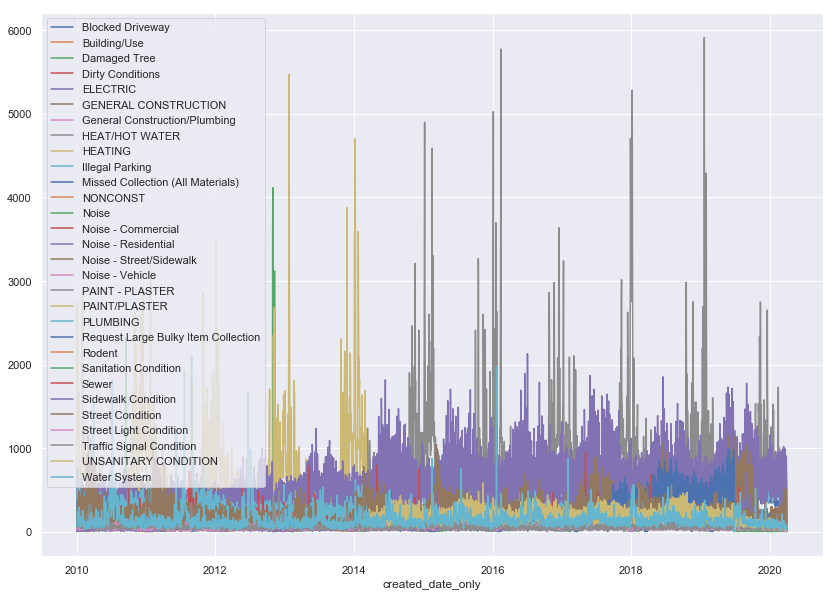

In [67]:
# test = df.groupby(['created_date_only','complaint_type']).agg('count')['created_date']

# fig, ax = plt.subplots(figsize=(14,10))

# ax = test.unstack().plot(ax=ax)
# plt.legend()

In [73]:
# pv = pd.pivot_table(df, index=df.created_day_o_yr, columns=df.created_yr, 
#                     values='created_date', aggfunc=len)
# pv

created_yr          2010    2011    2012    2013    2014    2015    2016  \
created_day_o_yr                                                           
1                 2451.0  2176.0  2014.0  2903.0  3280.0  3509.0  3633.0   
2                 3230.0  2414.0  3146.0  4975.0  4641.0  3489.0  3589.0   
3                 5051.0  4651.0  5871.0  4823.0  4975.0  3152.0  3806.0   
4                 6758.0  4426.0  7359.0  4357.0  5640.0  2982.0  6149.0   
5                 5862.0  4468.0  5146.0  3327.0  4378.0  4406.0  8749.0   
6                 4800.0  4279.0  4013.0  2808.0  4783.0  5061.0  5642.0   
7                 4504.0  3662.0  2427.0  4025.0  8723.0  6421.0  4361.0   
8                 4121.0  3297.0  2524.0  4233.0  8291.0  8147.0  4037.0   
9                 3277.0  2964.0  4322.0  4046.0  6281.0  5534.0  3716.0   
10                3686.0  5095.0  4003.0  3830.0  4752.0  4925.0  3684.0   
11                5335.0  4478.0  3871.0  3604.0  3459.0  4355.0  5009.0   
12                4766.0  4389.0  3898.0  2790.0  3701.0  4102.0  4835.0   
13                4769.0  4781.0  4242.0  2546.0  4140.0  4525.0  5572.0   
14                4005.0  4592.0  3820.0  3657.0  4361.0  4088.0  4900.0   
15                3852.0  3081.0  4032.0  4056.0  4290.0  3539.0  3809.0   
16                2455.0  2595.0  4888.0  3986.0  4304.0  3780.0  3270.0   
17                2483.0  3896.0  4480.0  3548.0  4190.0  4036.0  3486.0   
18                3036.0  5432.0  4503.0  4336.0  3254.0  3385.0  4764.0   
19                3961.0  4491.0  4822.0  3082.0  3596.0  3504.0  7154.0   
20                4061.0  4120.0  4228.0  2132.0  3583.0  4005.0  4948.0   
21                4086.0  3740.0  3800.0  4011.0  4580.0  4295.0  4850.0   
22                3866.0  3939.0  3346.0  5796.0  6495.0  3976.0  6825.0   
23                2680.0  3713.0  4247.0  6083.0  7102.0  3854.0  4356.0   
24                2424.0  6744.0  3788.0  9122.0  6340.0  3650.0  3573.0   
25                5164.0  5686.0  3729.0  6314.0  5066.0  3260.0  4211.0   
26                4625.0  4134.0  3540.0  4545.0  4407.0  4105.0  4436.0   
27                4442.0  3174.0  3588.0  3826.0  5290.0  3591.0  4331.0   
28                4348.0  3454.0  1522.0  4786.0  5899.0  4091.0  3778.0   
29                6131.0  2895.0  2626.0  4103.0  5437.0  4051.0  3870.0   
30                5598.0  2728.0  3965.0  3800.0  5717.0  3854.0  3644.0   
31                3943.0  4392.0  3606.0  4452.0  4222.0  5196.0  3451.0   
32                5178.0  4409.0  3381.0  4679.0  3665.0  3905.0  3707.0   
33                4576.0  4669.0  3768.0  3826.0  2871.0  4441.0  3933.0   
34                4225.0  4331.0  3739.0  3200.0  4188.0  4862.0  3889.0   
35                4020.0  4174.0  2682.0  4077.0  4205.0  4274.0  3972.0   
36                3776.0  2993.0  2458.0  2007.0  5068.0  4271.0  3874.0   
37                3029.0  2621.0  3691.0  2261.0  4786.0  4406.0  3575.0   
38                3136.0  4151.0  3739.0  2057.0  4263.0  3675.0  3594.0   
39                4663.0  5365.0  4100.0  2007.0  3919.0  3613.0  4106.0   
40                4119.0  5663.0  3484.0  1718.0  3471.0  4346.0  4255.0   
41                3132.0  4897.0  3181.0  1687.0  4714.0  3837.0  4167.0   
42                3269.0  3990.0  2726.0  2691.0  4831.0  4058.0  4549.0   
43                3589.0  3120.0  3266.0  2660.0  4631.0  3923.0  6130.0   
44                2647.0  2513.0  4269.0  2664.0  4820.0  5125.0  6230.0   
45                2201.0  4108.0  3354.0  2792.0  4496.0  4129.0  8619.0   
46                3039.0  4637.0  3467.0  3211.0  3597.0  5111.0  6732.0   
47                3948.0  4332.0  3358.0  2768.0  3438.0  8196.0  5759.0   
48                4231.0  3958.0  3327.0  3159.0  4349.0  5555.0  4753.0   
49                3874.0  3893.0  2265.0  4120.0  4429.0  4636.0  4530.0   
50                4226.0  3196.0  2374.0  3882.0  4359.0  5222.0  4495.0   
51                2959.0  3088.0  2770.0  3665.0

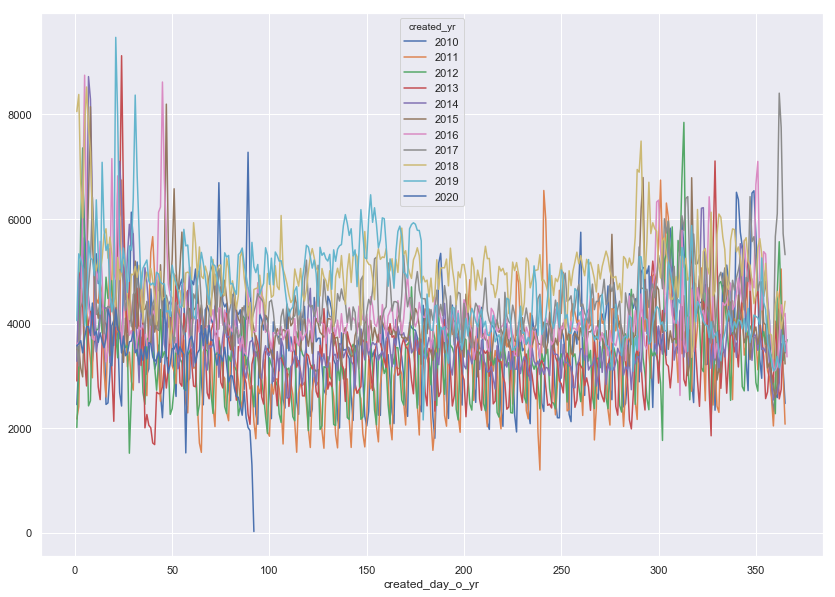

In [76]:
# fig, ax = plt.subplots(figsize=(14,10))
# pv.plot(ax=ax)

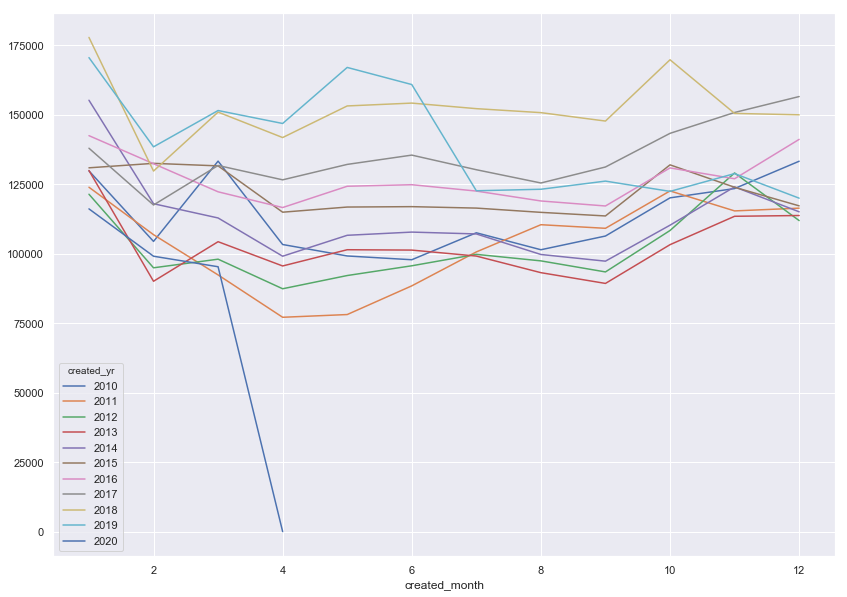

In [77]:
# pv = pd.pivot_table(df, index=df.created_month, columns=df.created_yr, 
#                     values='created_date', aggfunc=len)

# fig, ax = plt.subplots(figsize=(14,10))
# pv.plot(ax=ax)

In [35]:
# daily_calls_by_yr['total'] = daily_calls_by_yr.sum(axis=1)

# daily_calls_by_yr.head()

cmplnt_typ_Blocked Driveway  \
created_yr created_day_o_yr                                
2010       1                                       154.0   
           2                                       122.0   
           3                                        92.0   
           4                                       113.0   
           5                                       119.0   

                             cmplnt_typ_Building/Use  cmplnt_typ_Damaged Tree  \
created_yr created_day_o_yr                                                     
2010       1                                    17.0                      2.0   
           2                                    17.0                      7.0   
           3                                    13.0                     10.0   
           4                                    93.0                     20.0   
           5                                   112.0                     15.0   

                             cmplnt_typ_Dirty Conditions  cmplnt_typ_ELECTRIC  \
created_yr created_day_o_yr                                                     
2010       1                                        31.0                 37.0   
           2                                        35.0                 75.0   
           3                                        22.0                 79.0   
           4                                        78.0                170.0   
           5                                        98.0                176.0   

                             cmplnt_typ_GENERAL CONSTRUCTION  \
created_yr created_day_o_yr                                    
2010       1                                           130.0   
           2                                           194.0   
           3                                           331.0   
           4                                           779.0   
           5                                           631.0   

                             cmplnt_typ_General Construction/Plumbing  \
created_yr created_day_o_yr                                             
2010       1                                                     18.0   
           2                                                     38.0   
           3                                                     39.0   
           4                                                    129.0   
           5                                                    119.0   

                             cmplnt_typ_HEAT/HOT WATER  cmplnt_typ_HEATING  \
created_yr created_day_o_yr                                                  
2010       1                                       0.0               762.0   
           2                                       0.0              1433.0   
           3                                       0.0              2736.0   
           4                                       0.0              2645.0   
           5                                       0.0              1923.0   

                             cmplnt_typ_Illegal Parking  \
created_yr created_day_o_yr                               
2010       1                                        0.0   
           2                                        0.0   
           3                                        0.0   
           4                                        0.0   
           5                                        0.0   

                             cmplnt_typ_Missed Collection (All Materials)  \
created_yr created_day_o_yr                                                 
2010       1                                                         31.0   
           2                                                         22.0   
           3                                                        401.0   
           4                                                         83.0   
           5                                                         84.0   

          

In [66]:
# daily_calls_by_yr.describe()

cmplnt_typ_Blocked Driveway  cmplnt_typ_Building/Use  \
count                  3744.000000              3744.000000   
mean                    252.338942                68.718216   
std                     106.496126                30.566456   
min                       0.000000                 0.000000   
25%                     148.000000                42.000000   
50%                     246.000000                72.000000   
75%                     348.000000                91.000000   
max                     635.000000               343.000000   

       cmplnt_typ_Damaged Tree  cmplnt_typ_Dirty Conditions  \
count              3744.000000                  3744.000000   
mean                 62.864316                    89.747596   
std                 166.571979                    41.531130   
min                   0.000000                     0.000000   
25%                  21.000000                    58.000000   
50%                  37.000000                    87.000000   
75%                  63.000000                   116.000000   
max                4117.000000                   692.000000   

       cmplnt_typ_ELECTRIC  cmplnt_typ_GENERAL CONSTRUCTION  \
count          3744.000000                      3744.000000   
mean             79.409722                       125.584669   
std              38.963095                       180.426638   
min               0.000000                         0.000000   
25%              48.000000                         0.000000   
50%              78.000000                         0.000000   
75%             105.000000                       258.000000   
max             236.000000                       804.000000   

       cmplnt_typ_General Construction/Plumbing  cmplnt_typ_HEAT/HOT WATER  \
count                               3744.000000                3744.000000   
mean                                  74.889690                 338.935096   
std                                   37.790518                 594.197043   
min                                    0.000000                   0.000000   
25%                                   44.000000                   0.000000   
50%                                   74.000000                  77.000000   
75%                                   97.000000                 516.000000   
max                                  235.000000                5916.000000   

       cmplnt_typ_HEATING  cmplnt_typ_Illegal Parking  \
count         3744.000000                 3744.000000   
mean           220.678953                  252.560630   
std            480.289548                  172.198051   
min              0.000000                    0.000000   
25%              0.000000                  104.000000   
50%              0.000000                  210.500000   
75%            114.000000                  391.000000   
max           5472.000000                  904.000000   

       cmplnt_typ_Missed Collection (All Materials)  cmplnt_typ_NONCONST  \
count                                   3744.000000          3744.000000   
mean                                      69.617254            65.582532   
std                                       48.732485            93.237347   
min                                        0.000000             0.000000   
25%                                       37.000000             0.000000   
50%                                       60.000000             0.000000   
75%                                       98.000000           132.250000   
max                                      554.000000           365.000000   

       cmplnt_typ_Noise  cmplnt_typ_Noise - Commercial  \
count       3744.000000                    3744.000000   
mean         127.278045                      93.602297   
std           54.430713                      58.696616   
min            0.000000                       0.000000   
25%           87.000000                      51.000000   
50%          122.000000                      78.00000

# Response Time

In [14]:
# df.created_yr.dtype

dtype('int64')

In [15]:
# avg_response_by_complaint = df.groupby('complaint_type').response_time.agg(['mean'])
# avg_response_by_complaint = avg_response_by_complaint.sort_values(by=['mean'],
#                                                                   ascending=False)

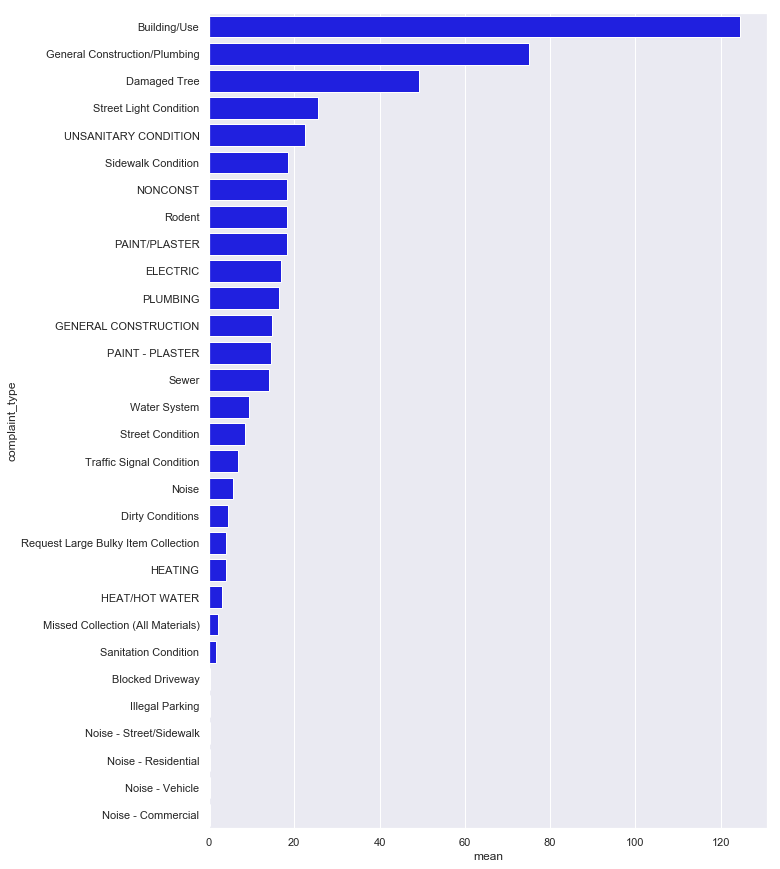

In [16]:
# ax = plt.figure(figsize=(10,15))
# ax = sns.barplot(y=avg_response_by_complaint.index, x='mean', 
#                  data=avg_response_by_complaint,
#                  color='blue')

In [17]:
# df.groupby('complaint_type').response_time.agg(['min', 'max', 'mean'])

min          max        mean
complaint_type                                                        
Blocked Driveway                     0.000289   286.407951    0.232859
Building/Use                         0.000069  3650.498542  124.625270
Damaged Tree                         0.001308  1978.043484   49.194355
Dirty Conditions                     0.000694   365.139583    4.500775
ELECTRIC                             0.005220  1207.767442   16.929697
GENERAL CONSTRUCTION                 1.000000   733.000000   14.861826
General Construction/Plumbing        0.000069  3609.275428   75.069243
HEAT/HOT WATER                       0.000012  1868.216620    3.080295
HEATING                              1.000000  1686.591192    4.009965
Illegal Parking                      0.000197   286.190266    0.231103
Missed Collection (All Materials)    0.000694   250.120833    2.218426
NONCONST                             1.000000  1207.768206   18.256535
Noise                                0.000694  2219.729861    5.567622
Noise - Commercial                   0.000208   363.163067    0.157230
Noise - Residential                  0.000116   623.015775    0.191895
Noise - Street/Sidewalk              0.000197   386.534861    0.196791
Noise - Vehicle                      0.000220    88.712037    0.175802
PAINT - PLASTER                      1.000000   726.000000   14.498796
PAINT/PLASTER                        0.005845  2835.530336   18.225556
PLUMBING                             0.003021  1891.750775   16.377213
Request Large Bulky Item Collection  0.000694   239.428472    4.017268
Rodent                               0.005764  1559.320775   18.230759
Sanitation Condition                 0.000694   357.575694    1.674710
Sewer                                0.000694  3571.681944   14.120642
Sidewalk Condition                   0.000613  1674.927512   18.439492
Street Condition                     0.000012  1816.618484    8.373354
Street Light Condition               0.000694  2392.808333   25.628149
Traffic Signal Condition             0.000694  1064.000000    6.694272
UNSANITARY CONDITION                 0.002882  1910.883461   22.623276
Water System                         0.000694  3562.136806    9.463396

In [29]:
# complaint_stats = {}

# # add the daily average number of complaints to a dataframe
# for col in complaint_type_columns:
#     complaint_stats[col] = round(daily_calls_by_yr[col].mean(),1)
    
# complaint_stats


{'cmplnt_typ_Blocked Driveway': 252.3,
 'cmplnt_typ_Building/Use': 68.7,
 'cmplnt_typ_Damaged Tree': 62.9,
 'cmplnt_typ_Dirty Conditions': 89.7,
 'cmplnt_typ_ELECTRIC': 79.4,
 'cmplnt_typ_GENERAL CONSTRUCTION': 125.6,
 'cmplnt_typ_General Construction/Plumbing': 74.9,
 'cmplnt_typ_HEAT/HOT WATER': 338.9,
 'cmplnt_typ_HEATING': 220.7,
 'cmplnt_typ_Illegal Parking': 252.6,
 'cmplnt_typ_Missed Collection (All Materials)': 69.6,
 'cmplnt_typ_NONCONST': 65.6,
 'cmplnt_typ_Noise': 127.3,
 'cmplnt_typ_Noise - Commercial': 93.6,
 'cmplnt_typ_Noise - Residential': 495.1,
 'cmplnt_typ_Noise - Street/Sidewalk': 127.0,
 'cmplnt_typ_Noise - Vehicle': 58.9,
 'cmplnt_typ_PAINT - PLASTER': 90.5,
 'cmplnt_typ_PAINT/PLASTER': 92.5,
 'cmplnt_typ_PLUMBING': 183.2,
 'cmplnt_typ_Request Large Bulky Item Collection': 85.4,
 'cmplnt_typ_Rodent': 53.8,
 'cmplnt_typ_Sanitation Condition': 73.5,
 'cmplnt_typ_Sewer': 90.8,
 'cmplnt_typ_Sidewalk Condition': 67.9,
 'cmplnt_typ_Street Condition': 224.5,
 'cmplnt_typ

In [30]:
# list(complaint_stats.values())

[252.3,
 68.7,
 62.9,
 89.7,
 79.4,
 125.6,
 74.9,
 338.9,
 220.7,
 252.6,
 69.6,
 65.6,
 127.3,
 93.6,
 495.1,
 127.0,
 58.9,
 90.5,
 92.5,
 183.2,
 85.4,
 53.8,
 73.5,
 90.8,
 67.9,
 224.5,
 60.4,
 67.4,
 121.1,
 148.4]

In [16]:
# df.groupby('complaint_type').complaint_type.agg('value_counts')

complaint_type                       complaint_type                     
Blocked Driveway                     Blocked Driveway                        944757
Building/Use                         Building/Use                            257281
Damaged Tree                         Damaged Tree                            235364
Dirty Conditions                     Dirty Conditions                        336015
ELECTRIC                             ELECTRIC                                297310
GENERAL CONSTRUCTION                 GENERAL CONSTRUCTION                    470189
General Construction/Plumbing        General Construction/Plumbing           280387
HEAT/HOT WATER                       HEAT/HOT WATER                         1268973
HEATING                              HEATING                                 826222
Illegal Parking                      Illegal Parking                         945587
Missed Collection (All Materials)    Missed Collection (All Materials)       260647
NON

In [18]:
# df3 = pd.DataFrame({'complaint_type': list(complaint_stats.keys()), 'avg_calls_day':list(complaint_stats.values())})
# df3.complaint_type = df3.complaint_type.str[11:]
# df3 = df3.merge(df.groupby('complaint_type').response_time.agg(['mean']), 
#                 on='complaint_type')
# df3 = df3.merge(df.complaint_type.value_counts(),
#                 on='complaint_type')
# df3.rename(columns={'mean':'avg_response_time'}, inplace=True)

# df3

NameError: name 'complaint_stats' is not defined

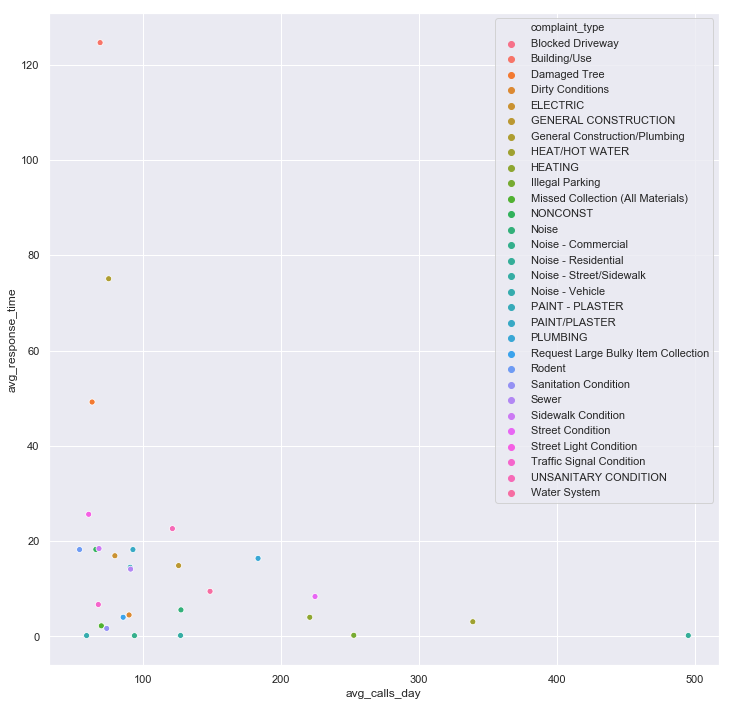

In [62]:
# ax = plt.figure(figsize=(12,12))
# ax = sns.scatterplot(x='avg_calls_day', y='avg_response_time', hue='complaint_type', data=df3)

In [ ]:
# df.groupby('complaint_type').response_time.agg(['count', 'mean'])

In [ ]:
# df.open_data_channel_type.value_counts(dropna=False)

In [ ]:
# print(df[df['complaint_type'] == 'Noise - Residential'].descriptor.value_counts())


In [ ]:
# for a in agencies:
#     print(a,': ')
#     print(df[df['agency'] == a].complaint_type.value_counts())
#     print('----' * 10)

In [ ]:
# for a in agencies:
#     print(a,': ')
#     print(df[df['agency'] == a].location_type.value_counts(dropna=False))
#     print('----' * 10, '\n')

In [ ]:
# df.status.value_counts(dropna=False)

In [ ]:
# df.open_data_channel_type.value_counts(dropna=False)

In [ ]:
# df.location_type.value_counts(dropna=False)